In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
dataset=pd.read_csv('Practice- driver-data.csv')
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [116]:
dataset=pd.read_csv('Practice- driver-data.csv')
df = dataset.iloc[:, [1, 2]].values

In [117]:
print(df[:5])

[[71.24 28.  ]
 [52.53 25.  ]
 [64.54 27.  ]
 [55.69 22.  ]
 [54.58 25.  ]]


In [118]:
#df.info()

In [119]:
df.shape

(4000, 2)

In [120]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# df2=sc.fit_transform(df)

In [121]:
#df2

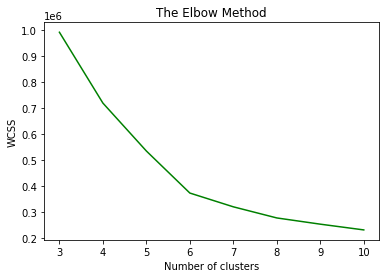

In [122]:
from sklearn.cluster import KMeans
distance = []
K = range(3,11)
for i in K:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df)
    distance.append(kmeans.inertia_) # within cluster sum
    
plt.plot(K, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [126]:
kmeans=KMeans(n_clusters=4,random_state=2021)
y_kmeans=kmeans.fit_predict(df)
dataset['result']=y_kmeans
dataset

,id,mean_dist_day,mean_over_speed_perc,result
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2
...,...,...,...,...
3995,3423310685,160.04,10,3
3996,3423312600,176.17,5,3
3997,3423312921,170.91,12,3
3998,3423313630,176.14,5,3


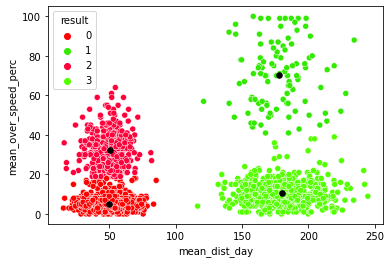

In [127]:
sns.scatterplot(x='mean_dist_day',y='mean_over_speed_perc',data=dataset,hue=dataset['result'],palette = 'prism')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color = 'black', s = 30)
plt.show()